##Lab3
##Assignment-I
###18th November, 2024

Nourin Nahar Hridy<br>
2021-1-60-102

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
# Check data types of all columns
df.dtypes

# Filter only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = df.shape

# Print the result
print(f'The dataset has {num_rows} rows and {num_columns} columns.')


The dataset has 253680 rows and 22 columns.


Correlation

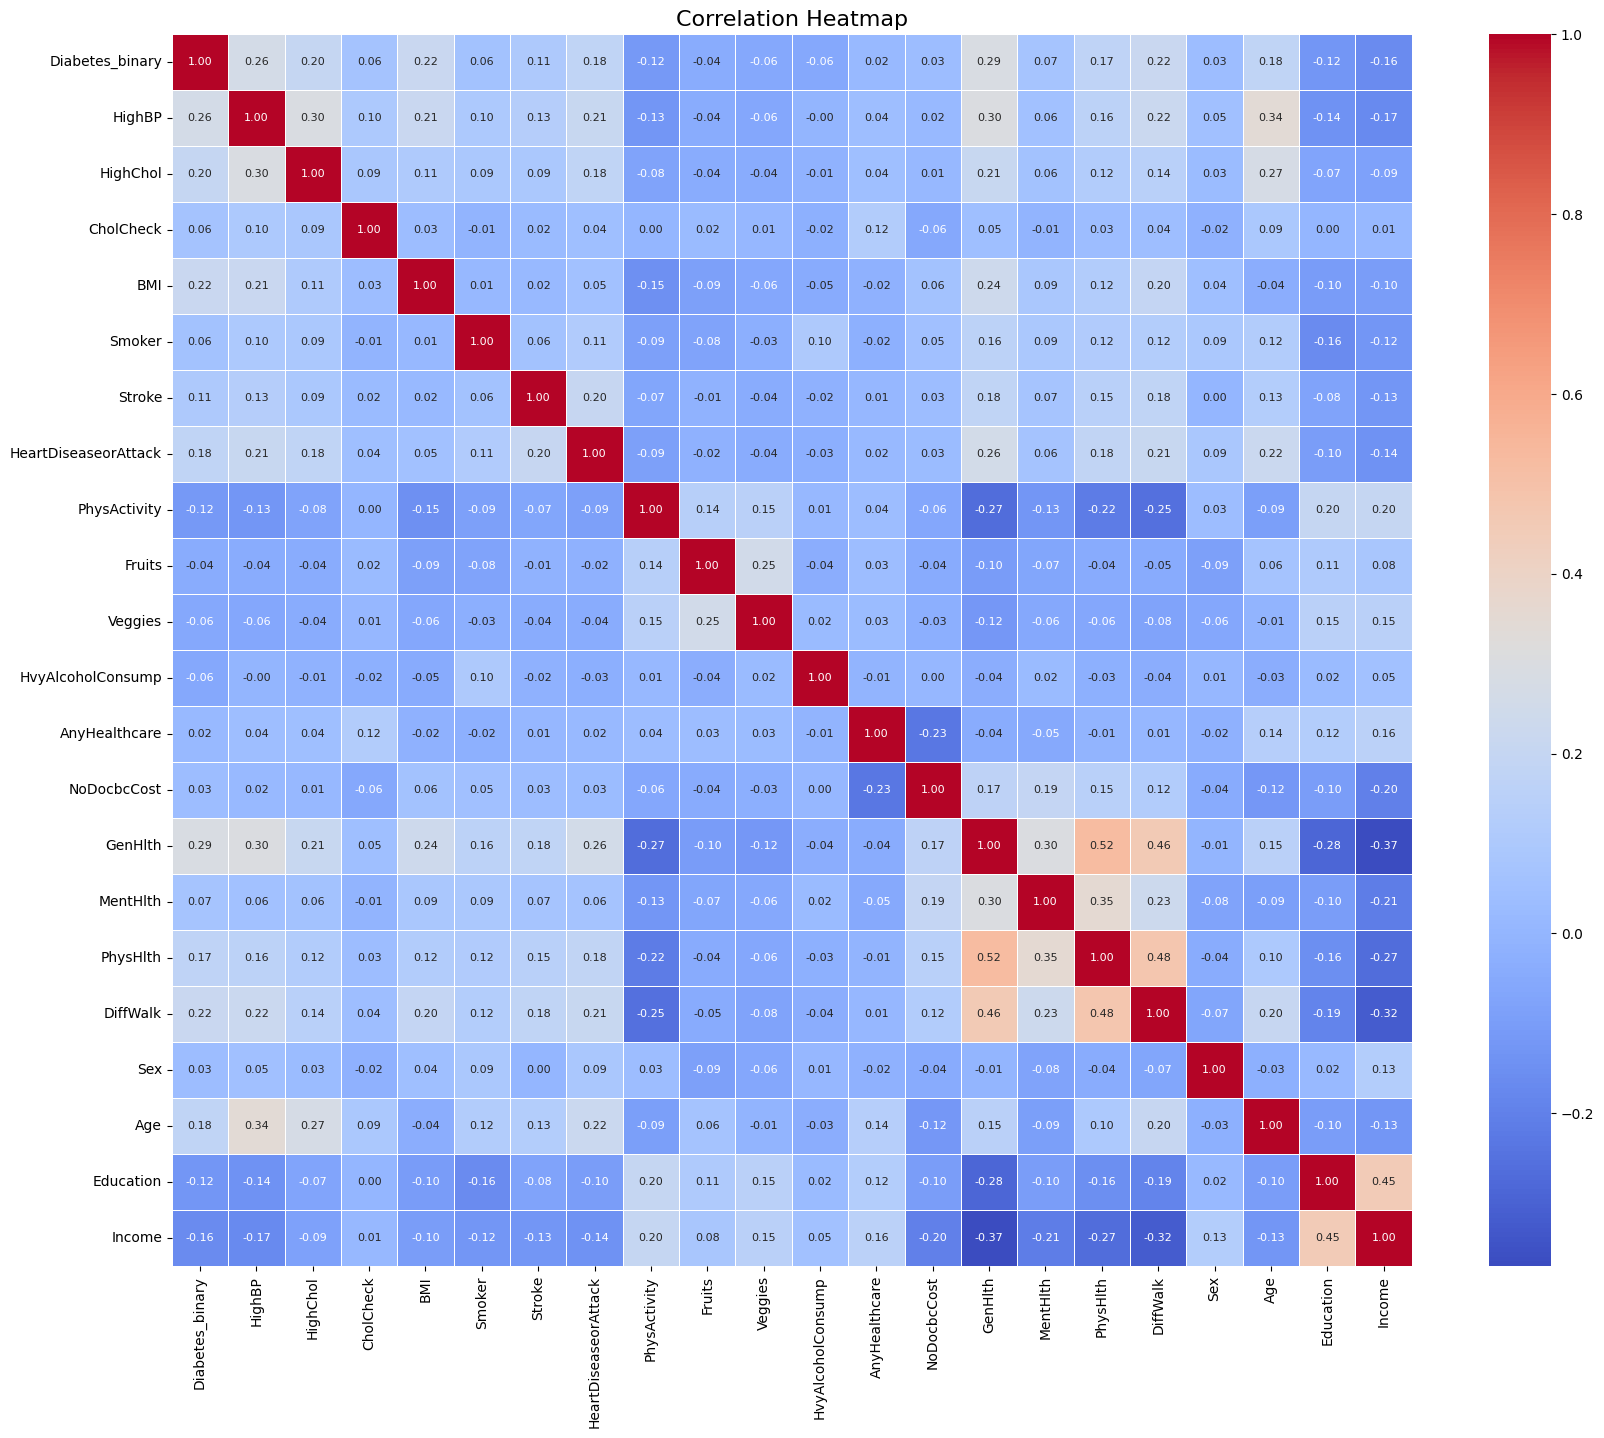

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Create a larger figure
plt.figure(figsize=(20, 16))  # Adjust the size as per your need

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Data Preprocessing

In [ ]:
# Drop the 'User ID' column as it is not needed for supervised learning
X = df.drop(['Diabetes_binary','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','Education','Income'], axis=1)
#X = df.drop(['Diabetes_binary','Education','Income'], axis=1)

y = df['Diabetes_binary']-1

# Split the features into categorical and numerical
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling for numerical features only
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(X[numerical_features])

# One-hot encoding for categorical features only
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])

# Concatenate the scaled numerical and encoded categorical data
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

data_X = final_df.copy()

In [ ]:
data_X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733


In [ ]:
X = data_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bagging Approach Using Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8514072847682119


Boosting Approach

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.8674708293913592


Stacking Approach

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

Stacking Model Accuracy: 0.8665838852097131


Voting Classifier With Logistic Regression

##Soft Voting

In [ ]:
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression())
    ],
    voting='soft'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))

Voting Classifier Accuracy: 0.865874329864396


##Hard Voting

In [ ]:
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression())
    ],
    voting='hard'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))

Voting Classifier Accuracy: 0.86729344055503


Evaluation

In [ ]:
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stacking_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))


Random Forest: 0.8514072847682119
Gradient Boosting: 0.8674708293913592
Stacking Model: 0.8665838852097131
Voting Classifier: 0.86729344055503


Cross-Validation Performance Comparison

In [ ]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('lr', LogisticRegression())
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('lr', LogisticRegression())
        ],
        voting='soft'
    )
}

# Perform cross-validation and store results
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, data_X, y, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.8504 ± 0.0017
Gradient Boosting Cross-Validation Accuracy: 0.8663 ± 0.0008
Stacking Cross-Validation Accuracy: 0.8628 ± 0.0021
Voting Cross-Validation Accuracy: 0.8647 ± 0.0008


Visualizing Cross-Validation Results


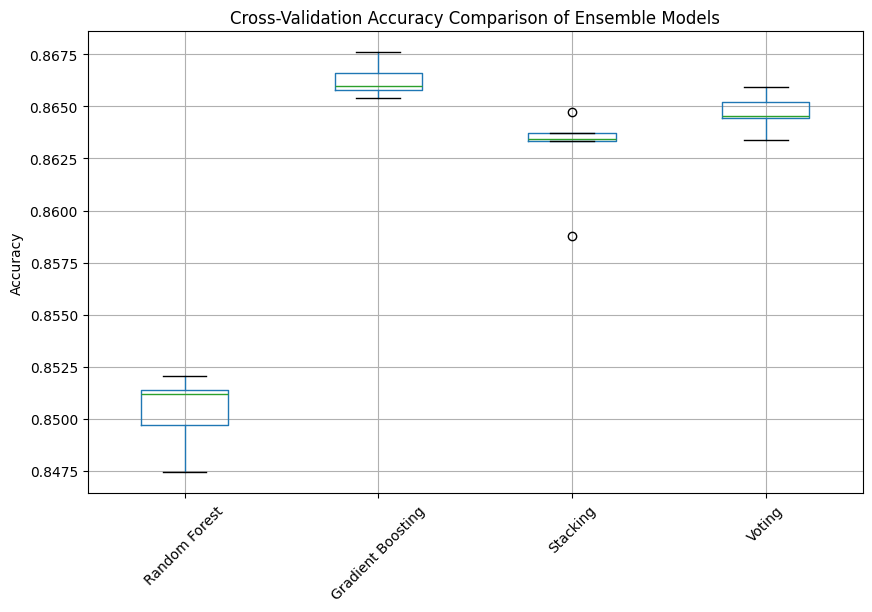

In [ ]:
import matplotlib.pyplot as plt

# Prepare results for visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


Cofusion Metrix for Each Model

50,736

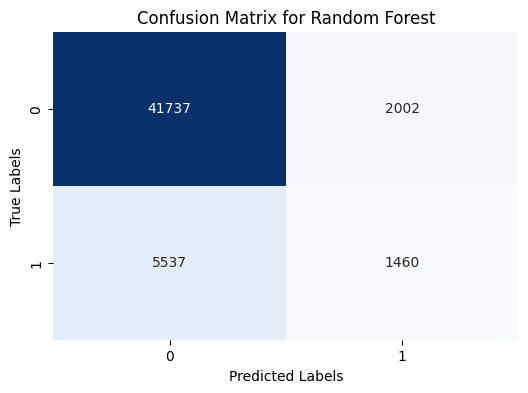

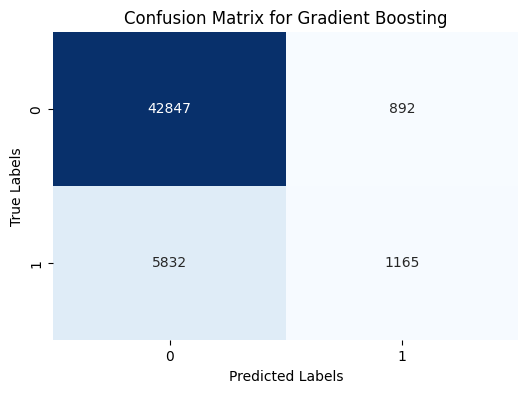

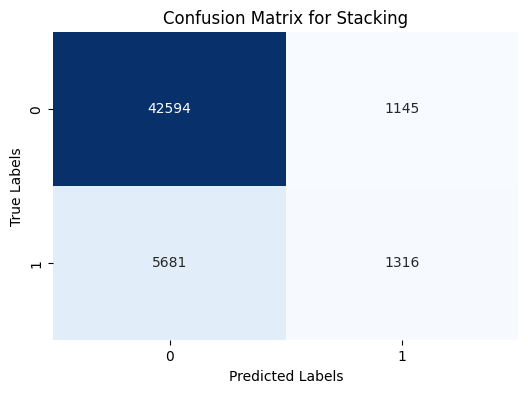

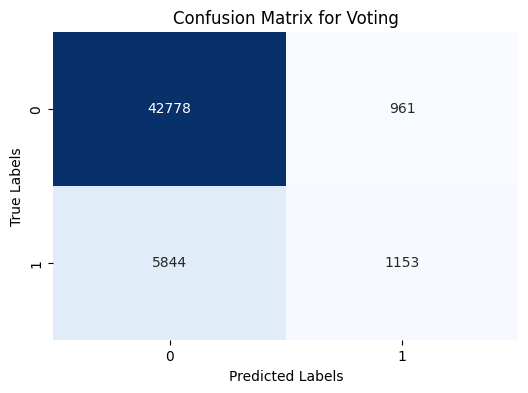

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Check if the confusion matrix sums up to the total number of test data
print(f"Confusion Matrix for {model_name}:\n", cm)
print(f"Sum of Confusion Matrix: {cm.sum()}")
print(f"Total number of test samples: {len(y_test)}")

# Should match the total number of test samples
assert cm.sum() == len(y_test), "The sum of the confusion matrix does not match the number of test samples!"


Confusion Matrix for Voting:
 [[42778   961]
 [ 5844  1153]]
Sum of Confusion Matrix: 50736
Total number of test samples: 50736


Precision and Recall for Each Model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")

Random Forest Performance Metrics:
 - Precision: 0.8193
 - Recall: 0.8514
 - F1 Score: 0.8292

Gradient Boosting Performance Metrics:
 - Precision: 0.8369
 - Recall: 0.8675
 - F1 Score: 0.8349

Stacking Performance Metrics:
 - Precision: 0.8344
 - Recall: 0.8655
 - F1 Score: 0.8365

Voting Performance Metrics:
 - Precision: 0.8337
 - Recall: 0.8659
 - F1 Score: 0.8335



Metrics Summary

In [ ]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.851407,0.819277,0.851407,0.829182
1,Gradient Boosting,0.867471,0.836914,0.867471,0.834858
2,Stacking,0.865460,0.834386,0.865460,0.836514
3,Voting,0.865874,0.833691,0.865874,0.833478


XAI

In [ ]:
import shap

# Use a subset of the data for SHAP to reduce computation time
X_sample = X_test.sample(100, random_state=42)

# Initialize SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(models["Random Forest"])
shap_values = explainer.shap_values(X_sample)

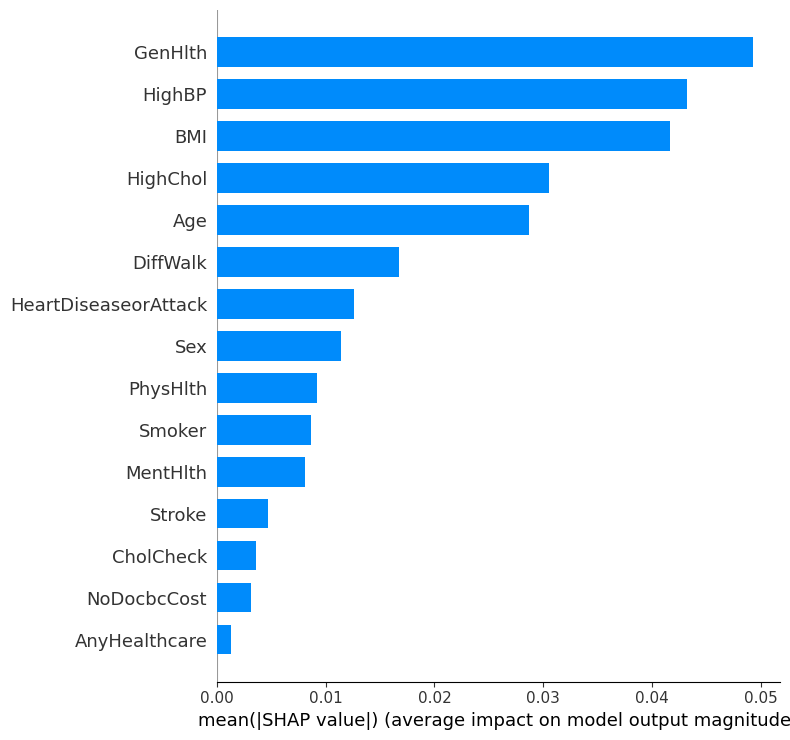

In [ ]:
import numpy as np

# Calculate mean absolute SHAP values across all classes for each feature
mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )
mean_shap_values = np.mean(mean_shap_values, axis=1)

# Repeat this vector to create a matrix that matches X_sample's shape
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))

# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)

SHAP for Grdaient Boosting

In [ ]:
# Use a subset of the data for SHAP to reduce computation time
X_sample_gb = X_test.sample(100, random_state=42)

# Initialize SHAP explainer for the Gradient Boosting model
explainer_gb = shap.TreeExplainer(models["Gradient Boosting"])
shap_values_gb = explainer_gb.shap_values(X_sample_gb)

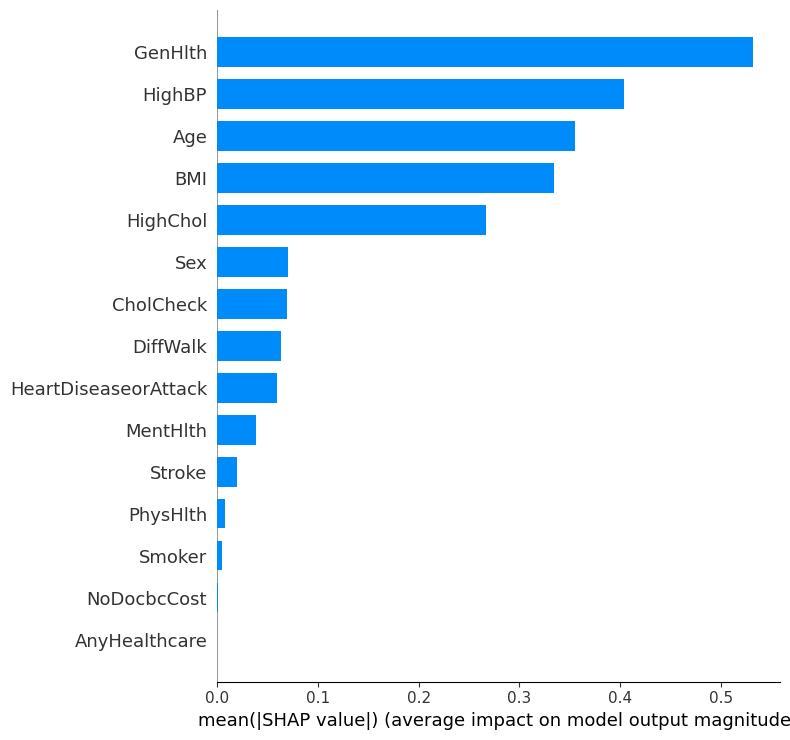

In [ ]:
# Calculate mean absolute SHAP values across all classes for each feature
mean_shap_values_gb = np.mean([np.abs(sv) for sv in shap_values_gb], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )
#mean_shap_values_gb = np.mean(mean_shap_values_gb, axis=1)

# Repeat this vector to create a matrix that matches X_sample's shape
mean_shap_values_repeated_gb = np.tile(mean_shap_values_gb, (X_sample_gb.shape[0], 1))

# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated_gb, X_sample_gb, plot_type="bar", feature_names=X_sample_gb.columns)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=780c35f5d4d81a99142a70509894f1d2e9ee7203599784a714a581430a84e254
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Ensure class names are provided as a list of labels
lime_explainer = LimeTabularExplainer(
    X_train.values,  # Training data
    feature_names=X.columns,  # Feature names
    class_names=['Not Diabetic', 'Diabetic'],  # Class names
    mode='classification'  # Classification mode
)

# Choose a sample from the test set to explain
sample_index = 10  # Adjust to analyze a different sample
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],  # Use pandas .iloc for correct indexing
    models["Random Forest"].predict_proba,  # Model's probability prediction
    num_features=10  # Number of features to explain
)

# Display the explanation in the notebook
exp.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
